In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random
import networkx as nx
from networkx.algorithms.approximation import min_weighted_vertex_cover

def hill_climbing(graph_name, q, random_seed, max_time):
    
    random.seed(random_seed)

    if graph_name == 'power':
        opt = 2203
    if graph_name == 'star2':
        opt = 4542
    
    G = nx.Graph()
    lines = open('./'+graph_name+'.graph', 'r').readlines()
    nV, nE, _ = lines[0].split()
    for i in range(1, int(nV)+1):
        vs = lines[i].split()
        for v in vs:
            G.add_edge(i, int(v))

    start_time = time.time()

    # Find an initial vertex cover

    C = []
    update_times = []
    update_results = []

    H = G.copy()

    while H.size():
        max_grade = max(H.degree, key=lambda x: x[1])[1]
        max_grade_nodes_list = [node[0] for node in H.degree if node[1] == max_grade]

        n = max_grade_nodes_list[0]

        H.remove_node(n)
        C.append(n)

    C_new = C

    lst = list(G.edges)
    
    k_opt = 0
    found_time = -1

    while ((time.time() - start_time) < max_time):

        c = 0
        for u,v in G.edges:
            if u not in C and v not in C:
                c = -1
                
        if c == 0:

            # C is a vertex cover, trace the improvements

            
            
            l = len(C)
            if (l-opt)/opt < q:
                k_opt = 1
            
            C_new = C.copy()
            C.pop(random.randrange(len(C)))

        if k_opt == 1:
            found_time = time.time() - start_time
            break

        if len(C) == 0:
            break
        # select exiting vertex

        values = [0 for _ in range(len(C))]
        dic = dict(zip(C, values))
        for u,v in G.edges:
            if u in C and v not in C:
                dic[u] += 1
            if u not in C and v in C:
                dic[v] += 1
        a = min(dic, key=dic.get)

        C.remove(a)

        # select entering vertex
        random.shuffle(lst)
        for u,v in lst:
            if u not in C and v not in C:
                C.append(v)
                break
                
    return found_time


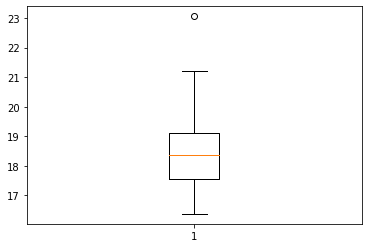

In [2]:
q = 0.03
max_time = 50
num_iter = 50
graph_name = 'power'


time_lst = []
for i in range(num_iter):
    random_seed = i
    found_time = hill_climbing(graph_name, q, random_seed, max_time)
    time_lst.append(found_time)

tmp = set(time_lst)
if -1 in tmp:
    tmp.remove(-1)
time_lst= list(tmp)

    
plt.boxplot(time_lst)
plt.show()